<a href="https://colab.research.google.com/github/aschelin/SimulacoesAGFE/blob/main/Aula_de_SC_EDPs2Ds_parte03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Este tutorial é baseado no material "[CFD Python: 12 steps to Navier-Stokes](https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/)" de Lorena A. Barba. 

Equações em mais Dimensões
=====
***

Até agora, trabalhamos com casos em uma dimensão espacial. Podemos aprender muito em apenas 1D, mas vamos avançar e ver o que acontece em duas ou mais dimensões. 

Para estender as fórmulas de diferenças finitas 1D nas derivadas parciais em 2D ou 3D, basta aplicar a definição: uma derivada parcial em relação a $x$ é a variação na direção de $x$ com $y$ *constante* .

No espaço 2D, uma grade retangular (uniforme) é definida pelos pontos com coordenadas:

$$x_i = x_0 +i \Delta x$$

$$y_i = y_0 +i \Delta y$$

Agora, defina $u_{i,j} = u(x_i,y_j)$ e aplique as fórmulas de diferenças finitas em qualquer uma das variáveis $x,y$  *atuando separadamente* sobre os índices $i$ e $j$. Todos as derivadas são baseados na expansão 2D Taylor de um valor de ponto de malha em torno de $u_{i,j}$.

Portanto, para uma derivada parcial de primeira ordem na direção $x$, uma fórmula de diferença finita é:

$$ \frac{\partial u}{\partial x}\biggr\rvert_{i,j} = \frac{u_{i+1,j}-u_{i,j}}{\Delta x}+\mathcal{O}(\Delta x)$$

e de forma semelhante na direção $y$. Assim, podemos escrever fórmulas de diferença para trás, para frente ou central.

Equação de Convecção Linear em 2D
----
***

A EDP da equação de convecção linear em 2D é dada por; 
The PDE governing 2-D Linear Convection is written as

$$\frac{\partial u}{\partial t}+c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$

Essa equação possui exatamente a mesma forma que a equação de convecção linear em 1D, exceto que agora ela possui duas dimensões espaciais e uma temporal. 

Mais uma vez, o tempo será discretizado como uma diferença para frente e ambos os passos espaciais serão discretizados como diferenças para trás.  

Com implementações 1-D, usamos o índice $i$ para denotar movimento no espaço (por exemplo, $u_{i}^n-u_{i-1}^n$).  Agora que temos duas dimensões a considerar, precisamos adicionar um segundo subscrito, $j$, para contabilizar todas as informações do regime.  

Aqui, usaremos novamente $i$ como índice para nossos valores de $x$, e adicionaremos o subscrito de $j$ para rastrear nossos valores de $y$.  


Com isso em mente, nossa discretização da EDP deve ser relativamente simples.  

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + c\frac{u_{i, j}^n-u_{i-1,j}^n}{\Delta x} + c\frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y}=0$$

Como antes, resolver para a única incógnita:

$$u_{i,j}^{n+1} = u_{i,j}^n-c \frac{\Delta t}{\Delta x}(u_{i,j}^n-u_{i-1,j}^n)-c \frac{\Delta t}{\Delta y}(u_{i,j}^n-u_{i,j-1}^n)$$

Resolveremos esta equação com as seguintes condições iniciais:

$$u(x,y) = \begin{cases}
\begin{matrix}
2\ \text{for} & 0.5 \leq x, y \leq 1 \cr
1\ \text{for} & \text{everywhere else}\end{matrix}\end{cases}$$

e condições de contorno:

$$u = 1\ \text{for } \begin{cases}
\begin{matrix}
x =  0,\ 2 \cr
y =  0,\ 2 \end{matrix}\end{cases}$$

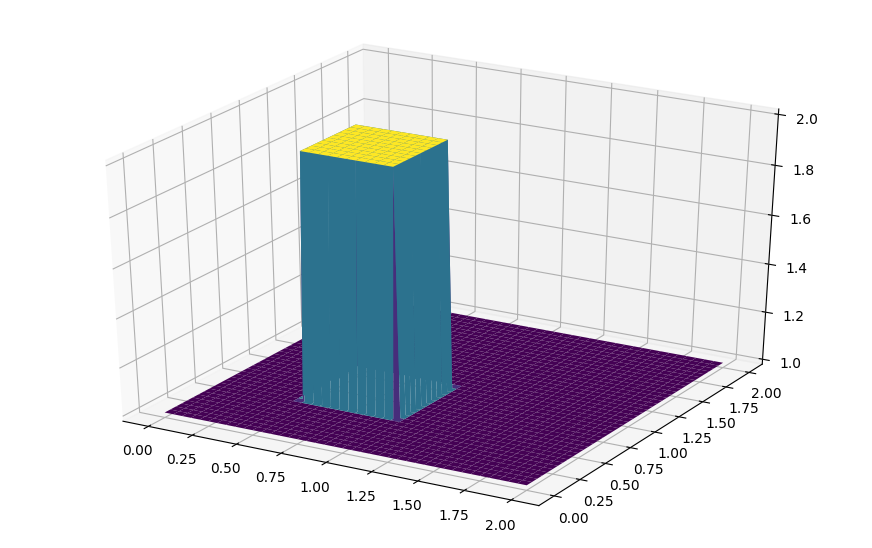

In [5]:
from mpl_toolkits.mplot3d import Axes3D    ##New Library required for projected 3d plots

import numpy
from matplotlib import pyplot, cm

###variable declarations
nx = 81
ny = 81
nt = 100
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
un = numpy.ones((ny, nx)) ##

###Assign initial conditions

##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2 

###Plot Initial Condition
##the figsize parameter can be used to produce different sized images
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = numpy.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)



##### Nota


Os valores `X` e `Y` que você passa ao comando `plot_surface` não são os vetores 1D `x` and `y`.  Para utilizar as funções de plotagem em 3D, é necessário gerar uma grade de valores `x, y` que correspondem a cada coordenada no quadro de plotagem.  Esta grade de coordenadas é gerada utilizando a função numérica `meshgrid`.

    X, Y = numpy.meshgrid(x, y)

 

### Iterando em duas dimensões


Para avaliar a onda em duas dimensões é necessário o uso de vários loops para cobrir todos os "i" e "j".  Como Python não é uma linguagem compilada, pode haver lentidão perceptível na execução de código com múltiplos for-loops.

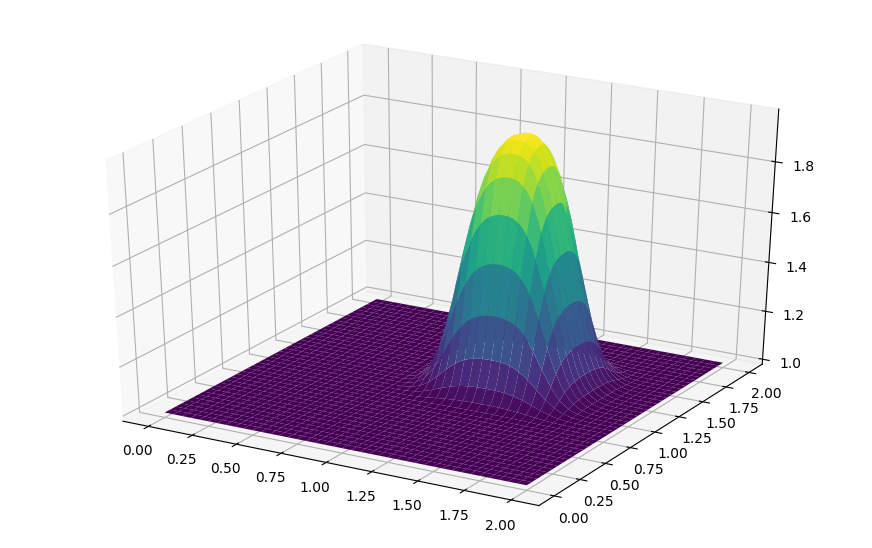

In [6]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    row, col = u.shape
    for j in range(1, row):
        for i in range(1, col):
            u[j, i] = (un[j, i] - (c * dt / dx * (un[j, i] - un[j, i - 1])) -
                                  (c * dt / dy * (un[j, i] - un[j - 1, i])))
            u[0, :] = 1
            u[-1, :] = 1
            u[:, 0] = 1
            u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

Operação de arrays
----------------

Aqui o mesmo código de convecção 2D é implementado, mas em vez de utilizar loops, os mesmos cálculos são avaliados usando operações de arrays.  

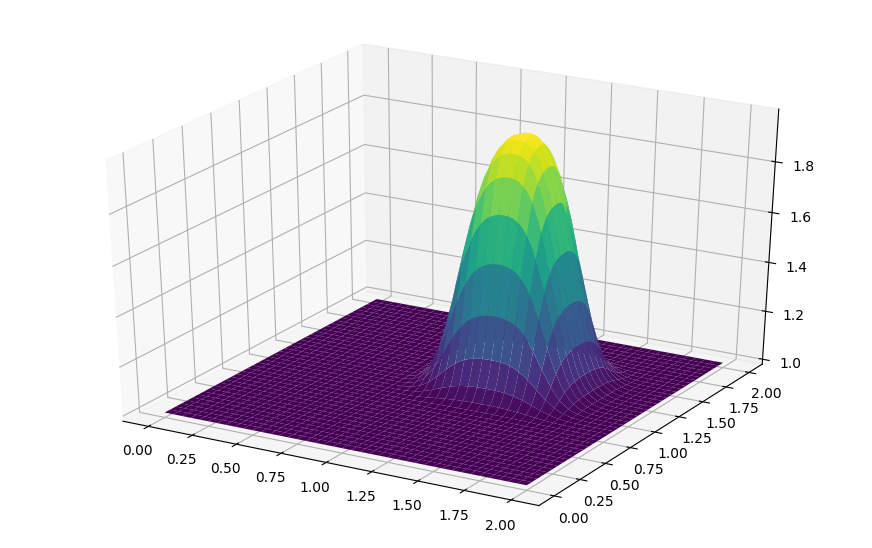

In [7]:
u = numpy.ones((ny, nx))
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    u[1:, 1:] = (un[1:, 1:] - (c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (c * dt / dy * (un[1:, 1:] - un[:-1, 1:])))
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1

fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

    

### Equação de Convecção não linear em 2D

Agora resolvemos a Convecção 2D, representada pelo par de equações diferenciais parciais acopladas abaixo:  

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = 0$$

$$\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = 0$$

Discretizando estas equações usando os métodos que aplicamos anteriormente:

$$\frac{u_{i,j}^{n+1}-u_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{u_{i,j}^n-u_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{u_{i,j}^n-u_{i,j-1}^n}{\Delta y} = 0$$

$$\frac{v_{i,j}^{n+1}-v_{i,j}^n}{\Delta t} + u_{i,j}^n \frac{v_{i,j}^n-v_{i-1,j}^n}{\Delta x} + v_{i,j}^n \frac{v_{i,j}^n-v_{i,j-1}^n}{\Delta y} = 0$$

Reorganizando as duas equações, resolvemos para $u_{i,j}^{n+1}$ e $v_{i,j}^{n+1}$, respectivamente.  Observe que estas equações também estão acopladas.

$$u_{i,j}^{n+1} = u_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (u_{i,j}^n-u_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (u_{i,j}^n-u_{i,j-1}^n)$$

$$v_{i,j}^{n+1} = v_{i,j}^n - u_{i,j} \frac{\Delta t}{\Delta x} (v_{i,j}^n-v_{i-1,j}^n) - v_{i,j}^n \frac{\Delta t}{\Delta y} (v_{i,j}^n-v_{i,j-1}^n)$$


#### Condições iniciais 

As condições iniciais são as mesmas que usamos para a convecção 1D, aplicadas em ambas as direções x e y.  


$$u,\ v\ = \begin{cases}\begin{matrix}
2 & \text{para } x,y \in (0.5, 1)\times(0.5,1) \cr
1 & \text{em todo o resto}
\end{matrix}\end{cases}$$

As condições de contorno mantem u e v iguais a 1 ao longo dos limites da grade:
$$u = 1,\ v = 1 \text{ para } \begin{cases} \begin{matrix}x=0,2\cr y=0,2 \end{matrix}\end{cases}$$


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import numpy

In [ ]:
###variable declarations
nx = 101
ny = 101
nt = 80
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)

u = numpy.ones((ny, nx)) ##create a 1xn vector of 1's
v = numpy.ones((ny, nx))
un = numpy.ones((ny, nx))
vn = numpy.ones((ny, nx))

###Assign initial conditions
##set hat function I.C. : u(.5<=x<=1 && .5<=y<=1 ) is 2
u[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2
##set hat function I.C. : v(.5<=x<=1 && .5<=y<=1 ) is 2
v[int(.5 / dy):int(1 / dy + 1), int(.5 / dx):int(1 / dx + 1)] = 2

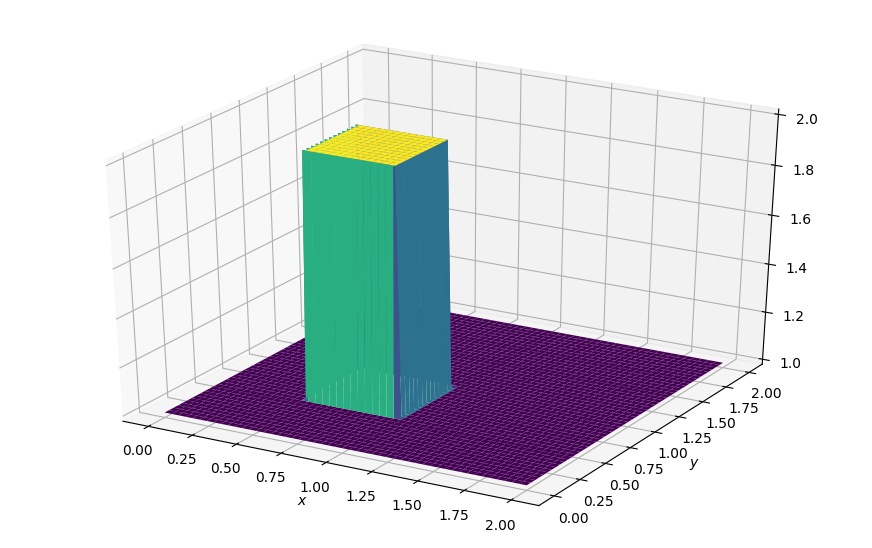

In [ ]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');

In [ ]:
for n in range(nt + 1): ##loop across number of time steps
    un = u.copy()
    vn = v.copy()
    u[1:, 1:] = (un[1:, 1:] - 
                 (un[1:, 1:] * c * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                  vn[1:, 1:] * c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))
    v[1:, 1:] = (vn[1:, 1:] -
                 (un[1:, 1:] * c * dt / dx * (vn[1:, 1:] - vn[1:, :-1])) -
                 vn[1:, 1:] * c * dt / dy * (vn[1:, 1:] - vn[:-1, 1:]))
    
    u[0, :] = 1
    u[-1, :] = 1
    u[:, 0] = 1
    u[:, -1] = 1
    
    v[0, :] = 1
    v[-1, :] = 1
    v[:, 0] = 1
    v[:, -1] = 1

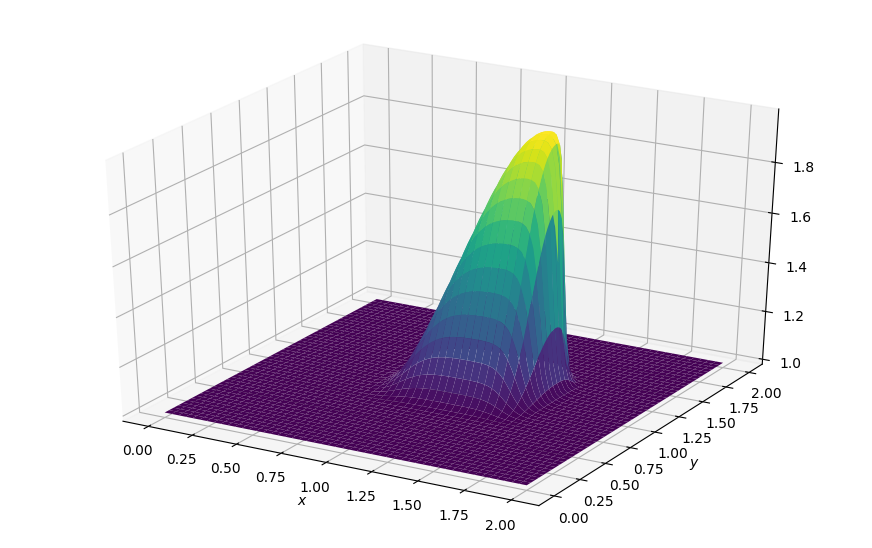

In [ ]:
fig = pyplot.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
X, Y = numpy.meshgrid(x, y)

ax.plot_surface(X, Y, u, cmap=cm.viridis, rstride=2, cstride=2)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$');